In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload data and unzip
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/Autism/data/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
filenames = os.listdir("/content/data/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,Autistic,1
1,Non_Autistic,0


In [ ]:
df.tail()


,filename,category
0,Autistic,1
1,Non_Autistic,0


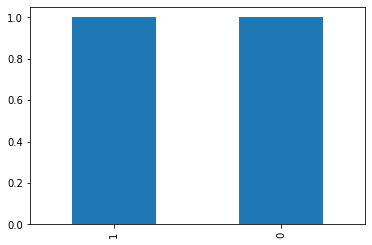

In [ ]:
df['category'].value_counts().plot.bar()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))""
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
from distutils.dir_util import copy_tree
toDir = "AllTrain"
fromdir = "/content/data/train/Autistic"
copy_tree(fromdir ,toDir)
fromdirNon = "/content/data/train/Non_Autistic"
copy_tree(fromdirNon ,toDir)

['AllTrain/0704.jpg',
 'AllTrain/0884.jpg',
 'AllTrain/0872.jpg',
 'AllTrain/0720.jpg',
 'AllTrain/0037.jpg',
 'AllTrain/0048.jpg',
 'AllTrain/0650.jpg',
 'AllTrain/0913.jpg',
 'AllTrain/0219.jpg',
 'AllTrain/0419.jpg',
 'AllTrain/1094.jpg',
 'AllTrain/0077.jpg',
 'AllTrain/0870.jpg',
 'AllTrain/1108.jpg',
 'AllTrain/0438.jpg',
 'AllTrain/0087.jpg',
 'AllTrain/0170.jpg',
 'AllTrain/0857.jpg',
 'AllTrain/0685.jpg',
 'AllTrain/0050.jpg',
 'AllTrain/1277.jpg',
 'AllTrain/0060.jpg',
 'AllTrain/0823.jpg',
 'AllTrain/0612.jpg',
 'AllTrain/0167.jpg',
 'AllTrain/0405.jpg',
 'AllTrain/0490.jpg',
 'AllTrain/0576.jpg',
 'AllTrain/0408.jpg',
 'AllTrain/0606.jpg',
 'AllTrain/0502.jpg',
 'AllTrain/1175.jpg',
 'AllTrain/1124.jpg',
 'AllTrain/0755.jpg',
 'AllTrain/0394.jpg',
 'AllTrain/0565.jpg',
 'AllTrain/0933.jpg',
 'AllTrain/0777.jpg',
 'AllTrain/1113.jpg',
 'AllTrain/0948.jpg',
 'AllTrain/0959.jpg',
 'AllTrain/0383.jpg',
 'AllTrain/0577.jpg',
 'AllTrain/0998.jpg',
 'AllTrain/0273.jpg',
 'AllTrain

In [ ]:
from distutils.dir_util import copy_tree
toDir = "AllValid"
fromdir = "/content/data/valid/Autistic"
copy_tree(fromdir ,toDir)
fromdirNon = "/content/data/valid/Non_Autistic"
copy_tree(fromdirNon ,toDir)

['AllValid/12.jpg',
 'AllValid/04.jpg',
 'AllValid/14.jpg',
 'AllValid/20.jpg',
 'AllValid/33.png',
 'AllValid/10.jpg',
 'AllValid/03.jpg',
 'AllValid/05.jpg',
 'AllValid/39.jpg',
 'AllValid/11.jpg',
 'AllValid/38.jpg',
 'AllValid/31.jpg',
 'AllValid/16.jpg',
 'AllValid/09.jpg',
 'AllValid/02.jpg',
 'AllValid/17.jpg',
 'AllValid/21.jpg',
 'AllValid/26.jpg',
 'AllValid/27.jpg',
 'AllValid/18.jpg',
 'AllValid/13.jpg',
 'AllValid/19.jpg',
 'AllValid/15.jpg',
 'AllValid/36.jpg',
 'AllValid/06.jpg',
 'AllValid/24.jpg',
 'AllValid/30.jpg',
 'AllValid/34.jpg',
 'AllValid/35.jpg',
 'AllValid/08.jpg',
 'AllValid/23.jpg',
 'AllValid/22.jpg',
 'AllValid/29.jpg',
 'AllValid/25.jpg',
 'AllValid/32.jpg',
 'AllValid/07.jpg',
 'AllValid/40.jpg',
 'AllValid/37.jpg',
 'AllValid/01.jpg',
 'AllValid/28.jpg']

In [ ]:
from distutils.dir_util import copy_tree
toDir = "AllTest"
fromdir = "/content/data/test/Autistic"
copy_tree(fromdir ,toDir)
fromdirNon = "/content/data/test/Non_Autistic"
copy_tree(fromdirNon ,toDir)

['AllTest/115.jpg',
 'AllTest/099.jpg',
 'AllTest/105.jpg',
 'AllTest/100.jpg',
 'AllTest/102.jpg',
 'AllTest/062.jpg',
 'AllTest/029.jpg',
 'AllTest/058.jpg',
 'AllTest/025.jpg',
 'AllTest/096.jpg',
 'AllTest/042.jpg',
 'AllTest/139.jpg',
 'AllTest/095.jpg',
 'AllTest/044.jpg',
 'AllTest/076.jpg',
 'AllTest/006.jpg',
 'AllTest/079.jpg',
 'AllTest/024.jpg',
 'AllTest/010.jpg',
 'AllTest/073.jpg',
 'AllTest/057.jpg',
 'AllTest/132.jpg',
 'AllTest/012.jpg',
 'AllTest/138.jpg',
 'AllTest/118.jpg',
 'AllTest/005.jpg',
 'AllTest/074.jpg',
 'AllTest/033.jpg',
 'AllTest/089.jpg',
 'AllTest/127.jpg',
 'AllTest/011.jpg',
 'AllTest/090.jpg',
 'AllTest/086.jpg',
 'AllTest/027.jpg',
 'AllTest/078.jpg',
 'AllTest/133.jpg',
 'AllTest/037.jpg',
 'AllTest/053.jpg',
 'AllTest/064.jpg',
 'AllTest/067.jpg',
 'AllTest/114.jpg',
 'AllTest/001.jpg',
 'AllTest/052.jpg',
 'AllTest/004.jpg',
 'AllTest/101.jpg',
 'AllTest/016.jpg',
 'AllTest/092.jpg',
 'AllTest/137.jpg',
 'AllTest/048.jpg',
 'AllTest/019.jpg',


In [ ]:
filenames = []
categories = []
Train_autistic = os.listdir("/content/data/train/Autistic/")
for filename in Train_autistic :
        categories.append(1)
filenames.extend(Train_autistic )

Train_non_autistic = os.listdir("/content/data/train/Non_Autistic/")
for filename in Train_non_autistic :
        categories.append(0)
filenames.extend(Train_non_autistic )

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

train_df["category"] = train_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 


In [ ]:
filenames2 = []
categories2= []
valid_autistic = os.listdir("/content/data/valid/Autistic/")
for filename in valid_autistic :
        categories2.append(1)
filenames2.extend(valid_autistic )

valid_non_autistic = os.listdir("/content/data/valid/Non_Autistic/")
for filename in valid_non_autistic :
        categories2.append(0)
filenames2.extend(valid_non_autistic )

valid_df = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

valid_df["category"] = valid_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [ ]:
filenames3 = []
categories3 = []
Test_autistic = os.listdir("/content/data/test/Autistic/")
for filename in Test_autistic :
        categories3.append(1)
filenames3.extend(Test_autistic )

Test_non_autistic = os.listdir("/content/data/test/Non_Autistic/")
for filename in Test_non_autistic :
        categories3.append(0)
filenames3.extend(Test_non_autistic )

test_df = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
})

test_df["category"] = test_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

In [ ]:

total_train=train_df.shape[0]
total_validate=valid_df.shape[0]
batch_size = 64

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, "AllTrain/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2654 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = train_datagen.flow_from_dataframe(
    valid_df, "AllValid/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 80 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "AllTest/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 280 validated image filenames belonging to 2 classes.


In [ ]:
epochs=30
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
41/41 [==============================] - 53s 509ms/step - loss: 1.3830 - accuracy: 0.5108 - val_loss: 1.1060 - val_accuracy: 0.4531
Epoch 2/30
41/41 [==============================] - 20s 492ms/step - loss: 1.0418 - accuracy: 0.4938 - val_loss: 1.3300 - val_accuracy: 0.5312
Epoch 3/30
41/41 [==============================] - 20s 492ms/step - loss: 0.9244 - accuracy: 0.5015 - val_loss: 0.9004 - val_accuracy: 0.5156
Epoch 4/30
41/41 [==============================] - 20s 486ms/step - loss: 0.9011 - accuracy: 0.4873 - val_loss: 0.9048 - val_accuracy: 0.5469
Epoch 5/30
41/41 [==============================] - 20s 493ms/step - loss: 0.8417 - accuracy: 0.4869 - val_loss: 1.9315 - val_accuracy: 0.4531
Epoch 6/30
41/41 [==============================] - 20s 492ms/step - loss: 0.8377 - accuracy: 0.4807 - val_loss: 0.7178 - val_accuracy: 0.4844
Epoch 7/30
41/41 [==============================] - 20s 489ms/step - loss: 0.7868 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.5000

In [ ]:
model.save("/content/drive/MyDrive/Autism/weights/cnn.h5")

In [ ]:
from keras.models import load_model
f1 = '/content/drive/MyDrive/Autism/weights/cnn.h5'
model = load_model(f1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [ ]:
test_filenames = os.listdir("AllTest/")
test1_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test1_df.shape[0]

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_generator

In [ ]:
# take test_df for splitting into test and train 

In [ ]:
labels = ['autistic', 'non_autistic']

# Predict the values from the validation dataset
Y_pred = model.predict(test_generator)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


In [ ]:
 test_df['category'] = test_df['category'].replace(['non_autistic','autistic'],[0,1])

In [ ]:
y_test = test_df.category.tolist()

In [ ]:
import numpy

In [ ]:
arr = numpy.array(y_test)

In [ ]:
# Convert validation observations to one hot vectors
print(classification_report(arr, Y_pred_classes, target_names=labels))

              precision    recall  f1-score   support

    autistic       0.48      0.24      0.32       140
non_autistic       0.49      0.74      0.59       140

    accuracy                           0.49       280
   macro avg       0.49      0.49      0.45       280
weighted avg       0.49      0.49      0.45       280

